In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn


In [33]:
df=pd.read_csv("data.csv")


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [35]:
df['time']=df['timestamp'].astype('datetime64[ns]')

In [36]:
df = df.drop("timestamp",axis=1)

In [37]:
df['equipment_energy_consumption']=pd.to_numeric(df['equipment_energy_consumption'], errors='coerce')

In [38]:
df['lighting_energy']=pd.to_numeric(df['lighting_energy'],errors='coerce')

In [39]:
df['zone1_humidity']=pd.to_numeric(df['zone1_humidity'],errors='coerce')


In [40]:
df['zone1_temperature']=pd.to_numeric(df['zone1_temperature'],errors='coerce')


In [41]:
df['zone2_temperature']=pd.to_numeric(df['zone2_temperature'],errors='coerce')


In [42]:
df.describe()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,time
count,15945.000000,15993.000000,15908.000000,15969.000000,15934.000000,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,...,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000,16857
mean,95.810413,3.938101,21.249414,39.046066,19.793113,39.494553,21.665733,38.201314,20.239922,37.945608,...,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780,2016-03-10 02:16:38.647446272
min,-1139.985693,-86.002966,8.726818,-46.660000,2.988199,-77.265503,6.543921,-71.406273,4.613485,-81.446225,...,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590,2016-01-11 17:00:00
25%,50.000000,0.000000,20.500000,37.026667,18.600000,37.757500,20.533333,36.592500,19.266667,35.200000,...,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789,2016-02-09 21:20:00
50%,60.000000,0.000000,21.323333,39.226667,19.600000,40.293333,21.767500,38.400000,20.290000,38.090000,...,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261,2016-03-10 00:10:00
75%,100.000000,0.000000,22.100000,42.500000,20.790000,43.000000,22.760000,41.433333,21.356667,41.560833,...,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764,2016-04-08 03:40:00
max,1139.985693,86.002966,33.746609,76.292756,36.552882,77.265503,36.823982,71.406273,35.921144,81.446225,...,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617,2016-12-01 15:50:00
std,182.753554,14.580575,2.165618,9.952521,2.943771,10.129513,2.594309,10.144388,2.783050,10.769813,...,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631,NaN


<Axes: xlabel='time', ylabel='equipment_energy_consumption'>

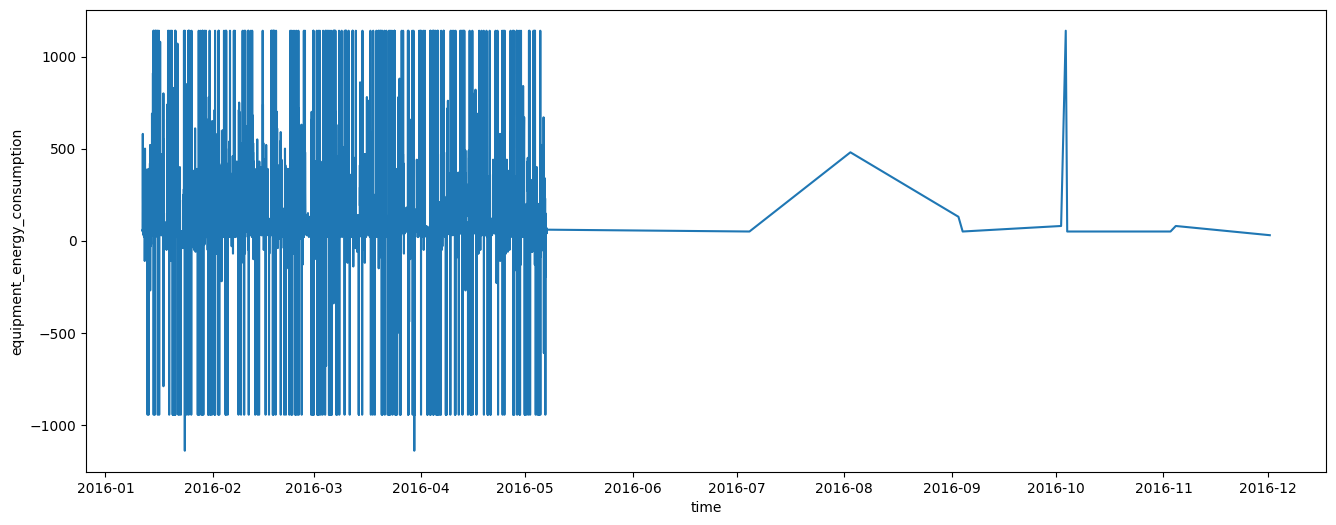

In [64]:
plt.figure(figsize=(16, 6))
sns.lineplot(x=df['time'],y=df['equipment_energy_consumption'])

<Axes: xlabel='equipment_energy_consumption', ylabel='Count'>

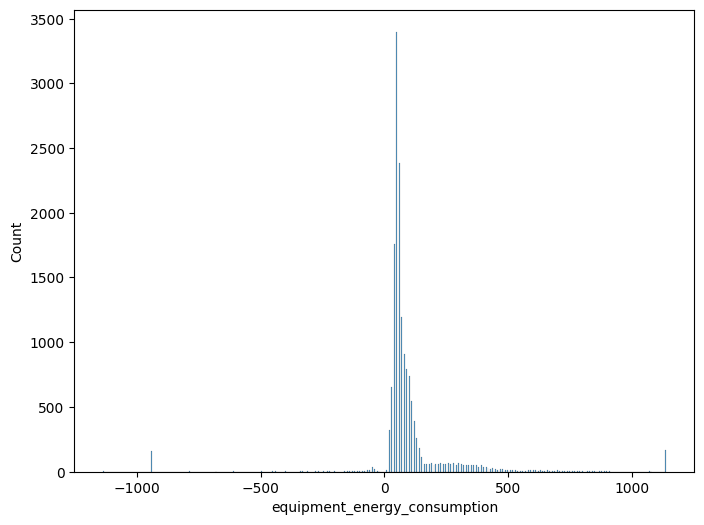

In [72]:
plt.figure(figsize=(8, 6))
sns.histplot(x=df['equipment_energy_consumption'])

<Axes: xlabel='equipment_energy_consumption'>

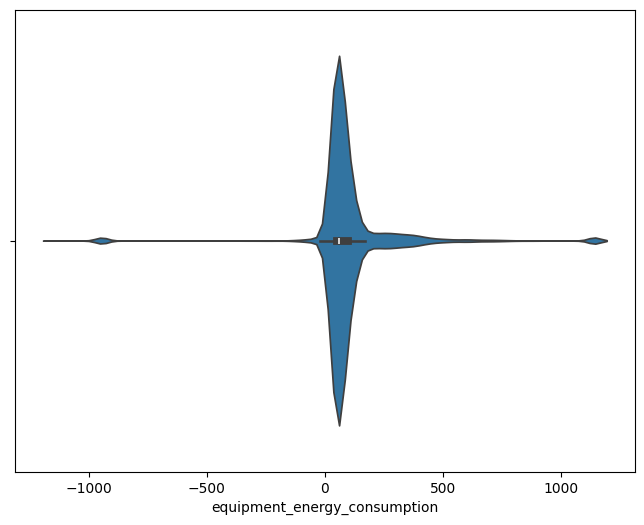

In [73]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['equipment_energy_consumption'])

In [65]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [66]:
datetime_col = 'time'  #separating date
df_datetime = df[datetime_col]
df_numerical = df.drop(columns=[datetime_col])


In [68]:

imputer = SimpleImputer(strategy='median')
df_numerical_imputed = pd.DataFrame(imputer.fit_transform(df_numerical), columns=df_numerical.columns)
scaler = MinMaxScaler()
df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df_numerical_imputed), columns=df_numerical.columns)

In [70]:

df_datetime = pd.to_datetime(df_datetime)
df_numerical_scaled['year'] = df_datetime.dt.year
df_numerical_scaled['month'] = df_datetime.dt.month
df_numerical_scaled['day'] = df_datetime.dt.day
df_numerical_scaled['hour'] = df_datetime.dt.hour
df_numerical_scaled['minute'] = df_datetime.dt.minute



In [71]:
df_final = df_numerical_scaled

In [46]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   equipment_energy_consumption  16857 non-null  float64
 1   lighting_energy               16857 non-null  float64
 2   zone1_temperature             16857 non-null  float64
 3   zone1_humidity                16857 non-null  float64
 4   zone2_temperature             16857 non-null  float64
 5   zone2_humidity                16857 non-null  float64
 6   zone3_temperature             16857 non-null  float64
 7   zone3_humidity                16857 non-null  float64
 8   zone4_temperature             16857 non-null  float64
 9   zone4_humidity                16857 non-null  float64
 10  zone5_temperature             16857 non-null  float64
 11  zone5_humidity                16857 non-null  float64
 12  zone6_temperature             16857 non-null  float64
 13  z

<Axes: >

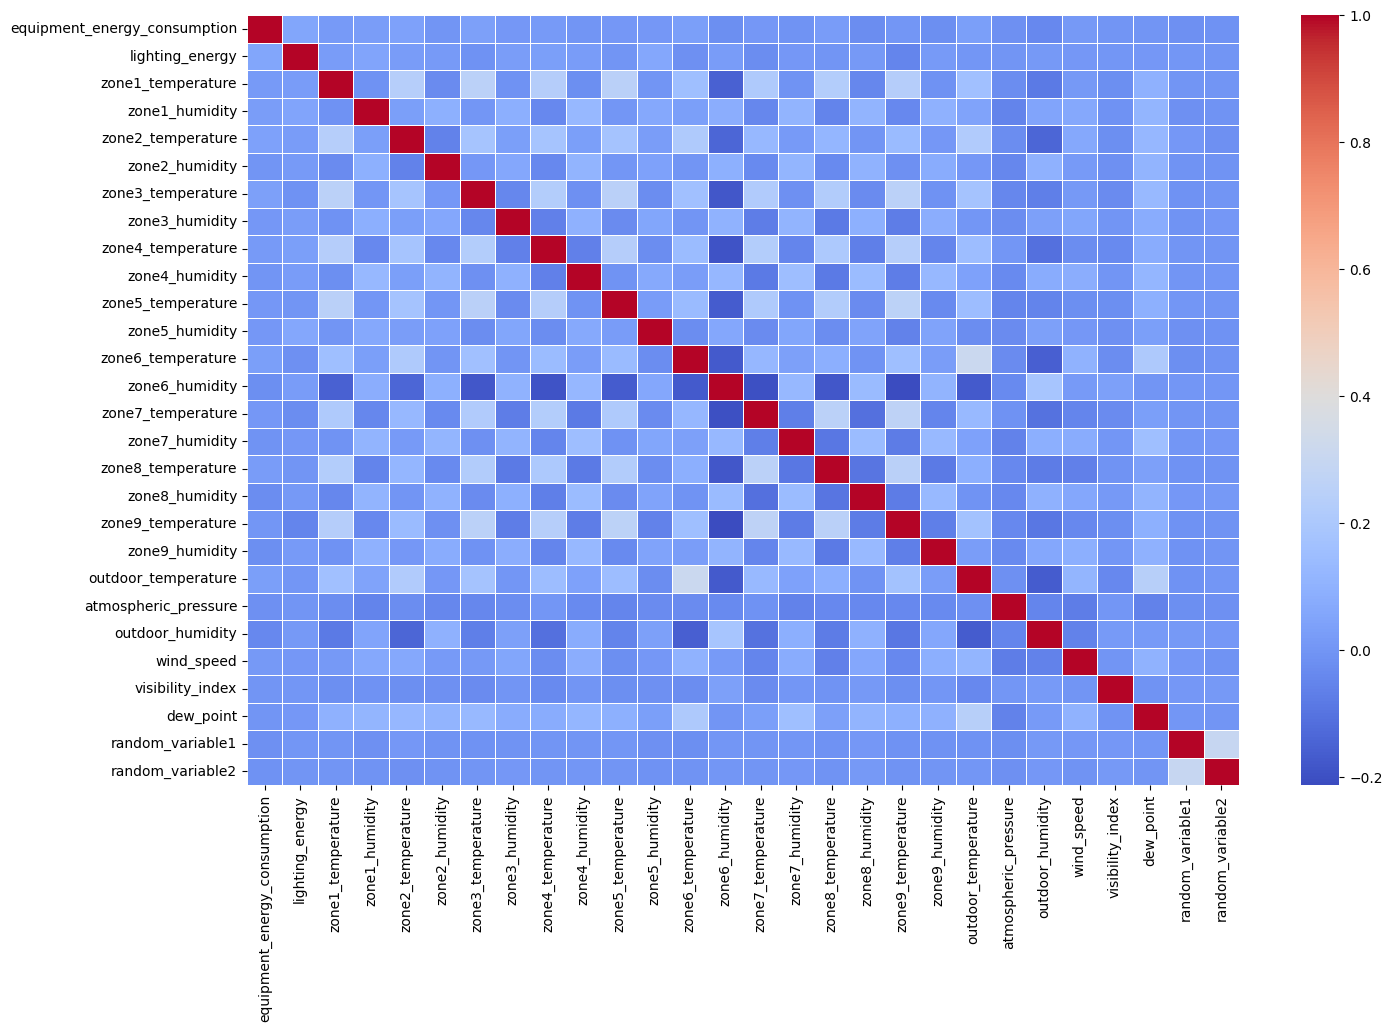

In [81]:
corr=df.corr(numeric_only=True)

plt.figure(figsize=(16, 10))
sns.heatmap(corr,cmap='coolwarm',fmt='.2f',linewidths=0.5,annot=False)

In [78]:
df_sorted = df_final.sort_values(by=['year', 'month', 'day', 'hour', 'minute']).reset_index(drop=True)





In [79]:
X = df_sorted.drop(columns='equipment_energy_consumption')
y = df_sorted['equipment_energy_consumption']

In [80]:
split_index = int(0.8 * len(df_sorted))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [48]:
for lag in [1, 2, 3]:  # you can tune the number of lags
    df_sorted[f'lag_{lag}'] = df_sorted['equipment_energy_consumption'].shift(lag)



In [49]:
df_sorted.dropna(inplace=True)


In [76]:
X = df_sorted.drop(columns='equipment_energy_consumption')
y = df_sorted['equipment_energy_consumption']




In [77]:
split_index = int(0.8 * len(df_sorted))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [52]:
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))

RMSE: 0.0051661601688783865
R² score: -0.006583624926025156


In [53]:
for lag in range(1, 6):
    df_sorted[f'lag_{lag}'] = df_sorted['equipment_energy_consumption'].shift(lag)

df_sorted.dropna(inplace=True)


In [54]:
df_sorted['rolling_mean_3'] = df_sorted['equipment_energy_consumption'].rolling(window=3).mean()
df_sorted['rolling_std_3'] = df_sorted['equipment_energy_consumption'].rolling(window=3).std()
df_sorted.dropna(inplace=True)



In [55]:
X = df_sorted.drop(columns='equipment_energy_consumption')
y = df_sorted['equipment_energy_consumption']

split_index = int(0.8 * len(df_sorted))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [61]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


MSE: 0.00012193363464274382
RMSE: 0.011042356389953361
R² score: 0.9762488659936195


In [74]:
'''#gridsearchcv
 {
 'bootstrap': True,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,


 'n_estimators': 100,
 'n_jobs': None,
 'random_state': None,
 'verbose': 0,
 'warm_start': False
 }'''

"#gridsearchcv\n {\n 'bootstrap': True,\n 'criterion': 'squared_error',\n 'max_depth': None,\n 'max_features': 1.0,\n 'max_leaf_nodes': None,\n 'max_samples': None,\n 'min_samples_leaf': 1,\n 'min_samples_split': 2,\n\n\n 'n_estimators': 100,\n 'n_jobs': None,\n 'random_state': None,\n 'verbose': 0,\n 'warm_start': False\n }"

In [75]:
from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² score:", r2_score(y_test, y_pred))


MSE: 0.00012193363464274382
RMSE: 0.011042356389953361
R² score: 0.9762488659936195


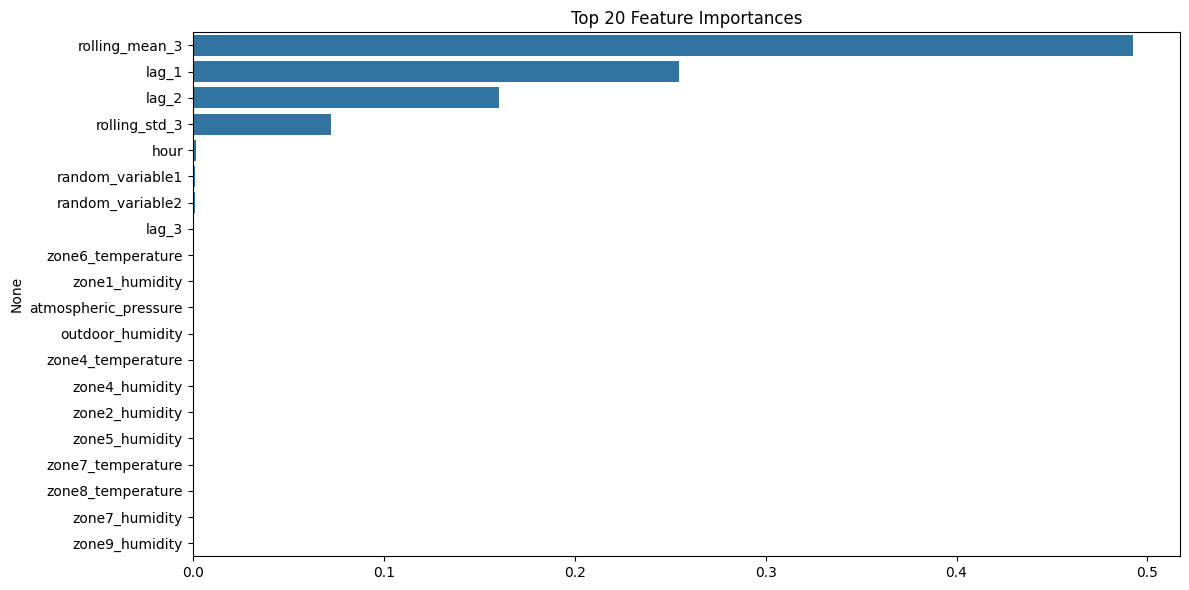

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=feat_imp.values[:20], y=feat_imp.index[:20])
plt.title("Top 20 Feature Importances")
plt.tight_layout()
plt.show()


In [58]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [59]:
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                 Feature  Importance
37        rolling_mean_3    0.492417
32                 lag_1    0.254600
33                 lag_2    0.160617
38         rolling_std_3    0.072217
30                  hour    0.001649
25      random_variable1    0.001352
26      random_variable2    0.000954
34                 lag_3    0.000798
11     zone6_temperature    0.000739
2         zone1_humidity    0.000704
20  atmospheric_pressure    0.000690
21      outdoor_humidity    0.000685
7      zone4_temperature    0.000683
8         zone4_humidity    0.000667
4         zone2_humidity    0.000661
10        zone5_humidity    0.000613
13     zone7_temperature    0.000574
15     zone8_temperature    0.000567
14        zone7_humidity    0.000559
18        zone9_humidity    0.000557
36                 lag_5    0.000534
1      zone1_temperature    0.000532
35                 lag_4    0.000528
3      zone2_temperature    0.000528
12        zone6_humidity    0.000526
6         zone3_humidity    0.000484
9

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))

print("R²:", r2_score(y_test, y_pred))


MAE: 0.0027190675779049187
RMSE: 0.011042356389953361
R²: 0.9762488659936195
